# CRISP data mining pipeline

# 1. Business Understanding

Objective: Predict Pollution Rate (PR).

Why: Pollution affects health, urban planning and settlement, and housing policies.

Goal: Build a model that estimates PR using socio-economic, environmental, and property attributes .

# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_excel('HousingData.xlsx')
house_data.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


In [5]:
house_data.tail()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
501,602,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,NaN,1.0,21.0,NaN,9.67,4.0,273.0
502,603,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,6.0,273.0
503,604,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,9.0,273.0
504,605,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,2.0,273.0
505,606,NaN,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,21.0,396.90,7.88,11.0,273.0


In [3]:
# Drop ID column (not predictive)
house_data = house_data.drop(columns=["PID"])

Why PID is dropped:

It’s just an identifier (Property ID) → it doesn’t carry useful information about the house itself.

It doesn’t explain pollution (PR) → the model can’t learn a meaningful relationship between a random ID number and pollution.

If we keep it, it may confuse the model → algorithms might falsely treat PID as a numeric predictor and try to fit patterns where none exist (overfitting).


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     504 non-null    float64
 1   AC       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   LS       504 non-null    float64
 4   PR       503 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      502 non-null    float64
 7   DIS      503 non-null    float64
 8   RAD      504 non-null    float64
 9   PTRATIO  503 non-null    float64
 10  DMT      502 non-null    float64
 11  LSTAT    505 non-null    float64
 12  MO       504 non-null    float64
 13  TAX      505 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
house_data.describe()

,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


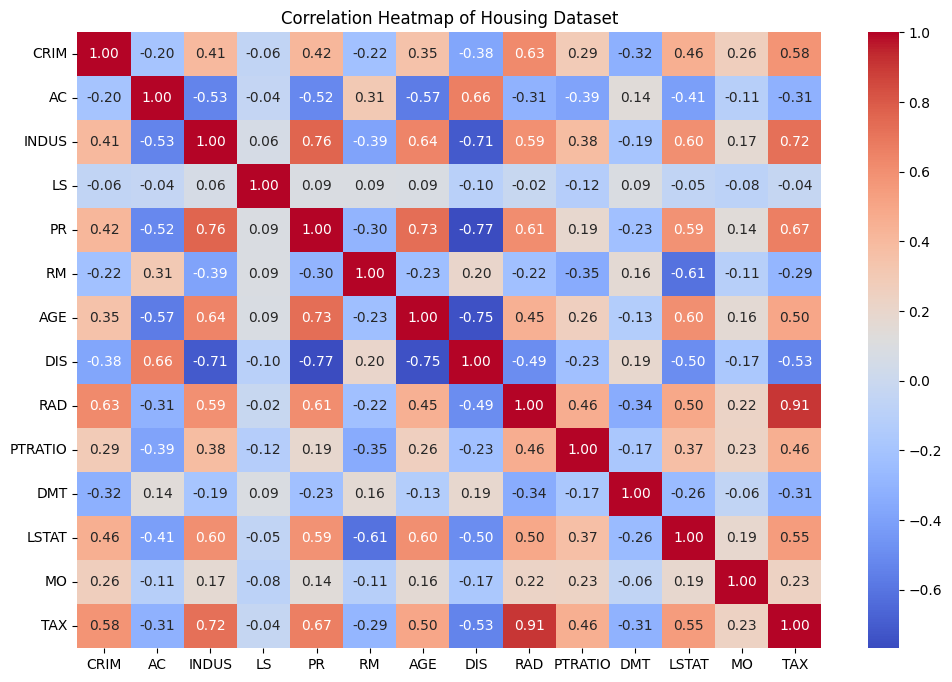

In [8]:

plt.figure(figsize=(12,8))
corr = house_data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Housing Dataset")
plt.show()

This shows how PR relates to other features.

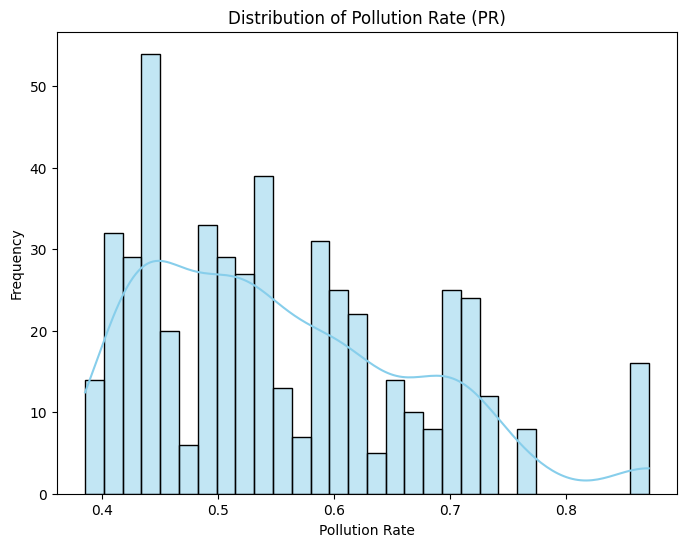

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(house_data["PR"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Pollution Rate (PR)")
plt.xlabel("Pollution Rate")
plt.ylabel("Frequency")
plt.show()

Helps identify skewness in the target variable.

# 3. Data Preparation

In [10]:
house_data.isna().sum()

CRIM       2
AC         0
INDUS      0
LS         2
PR         3
RM         4
AGE        4
DIS        3
RAD        2
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64

In [4]:
house_data_numeric = house_data.select_dtypes(include=['float', 'int'])
house_data_numeric

,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,NaN,1.0,21.0,NaN,9.67,4.0,273.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,6.0,273.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,9.0,273.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,2.0,273.0


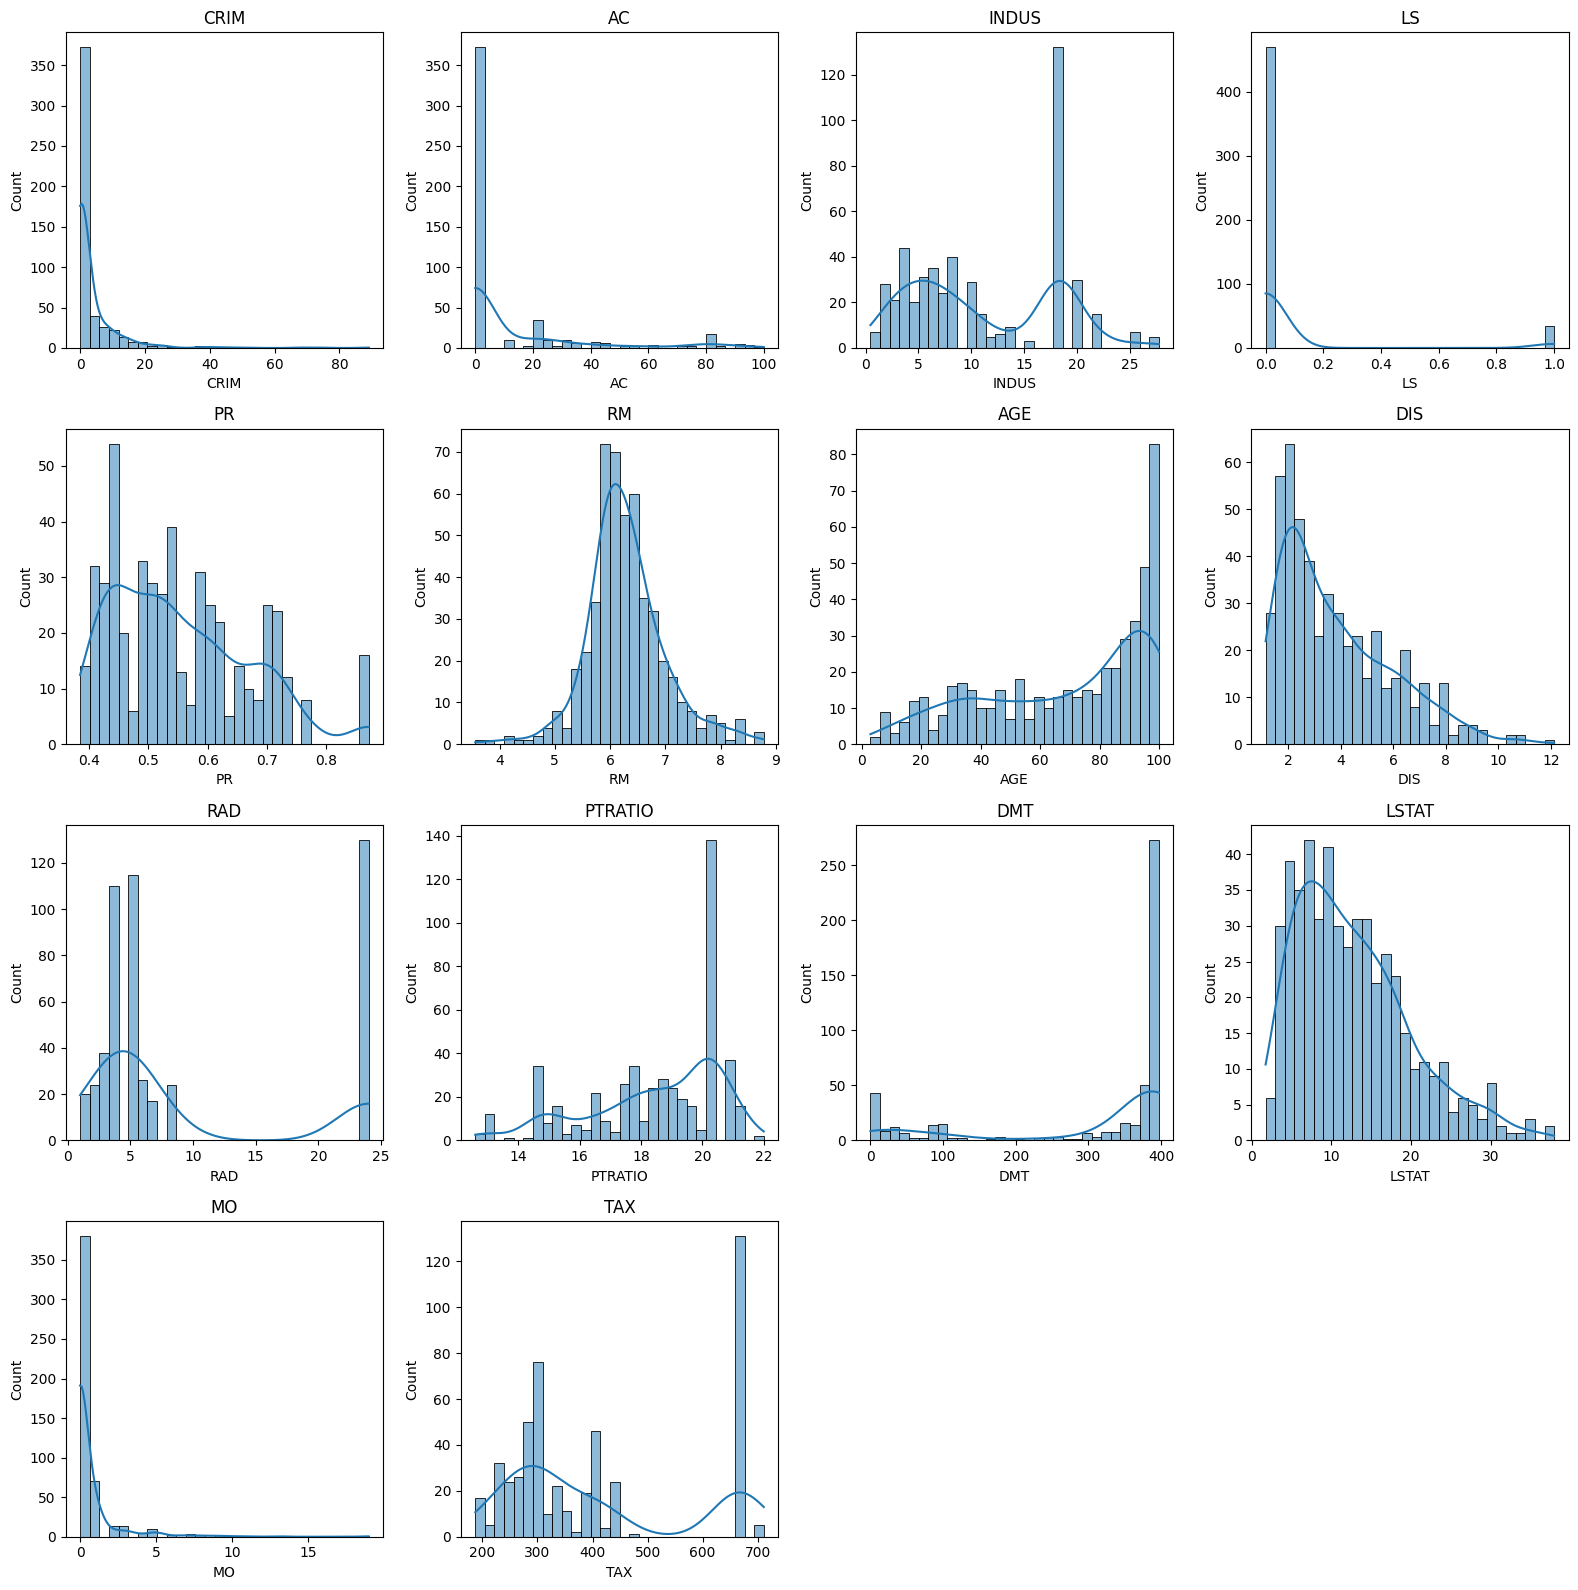

In [5]:

plt.figure(figsize=(16, 16))
for i, col in enumerate(house_data_numeric.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(house_data_numeric[col].dropna(), kde=True, bins=30)
    plt.title(f"{col}")
plt.tight_layout()
plt.show()


Since the data is continuous in nature with no categorial values present and the distribbution is skewed, we impute for the missing values using median

In [6]:
house_data_imputed = house_data.fillna(house_data.median(numeric_only=True))

In [14]:
house_data_imputed.isna().sum()

CRIM       0
AC         0
INDUS      0
LS         0
PR         0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
DMT        0
LSTAT      0
MO         0
TAX        0
dtype: int64

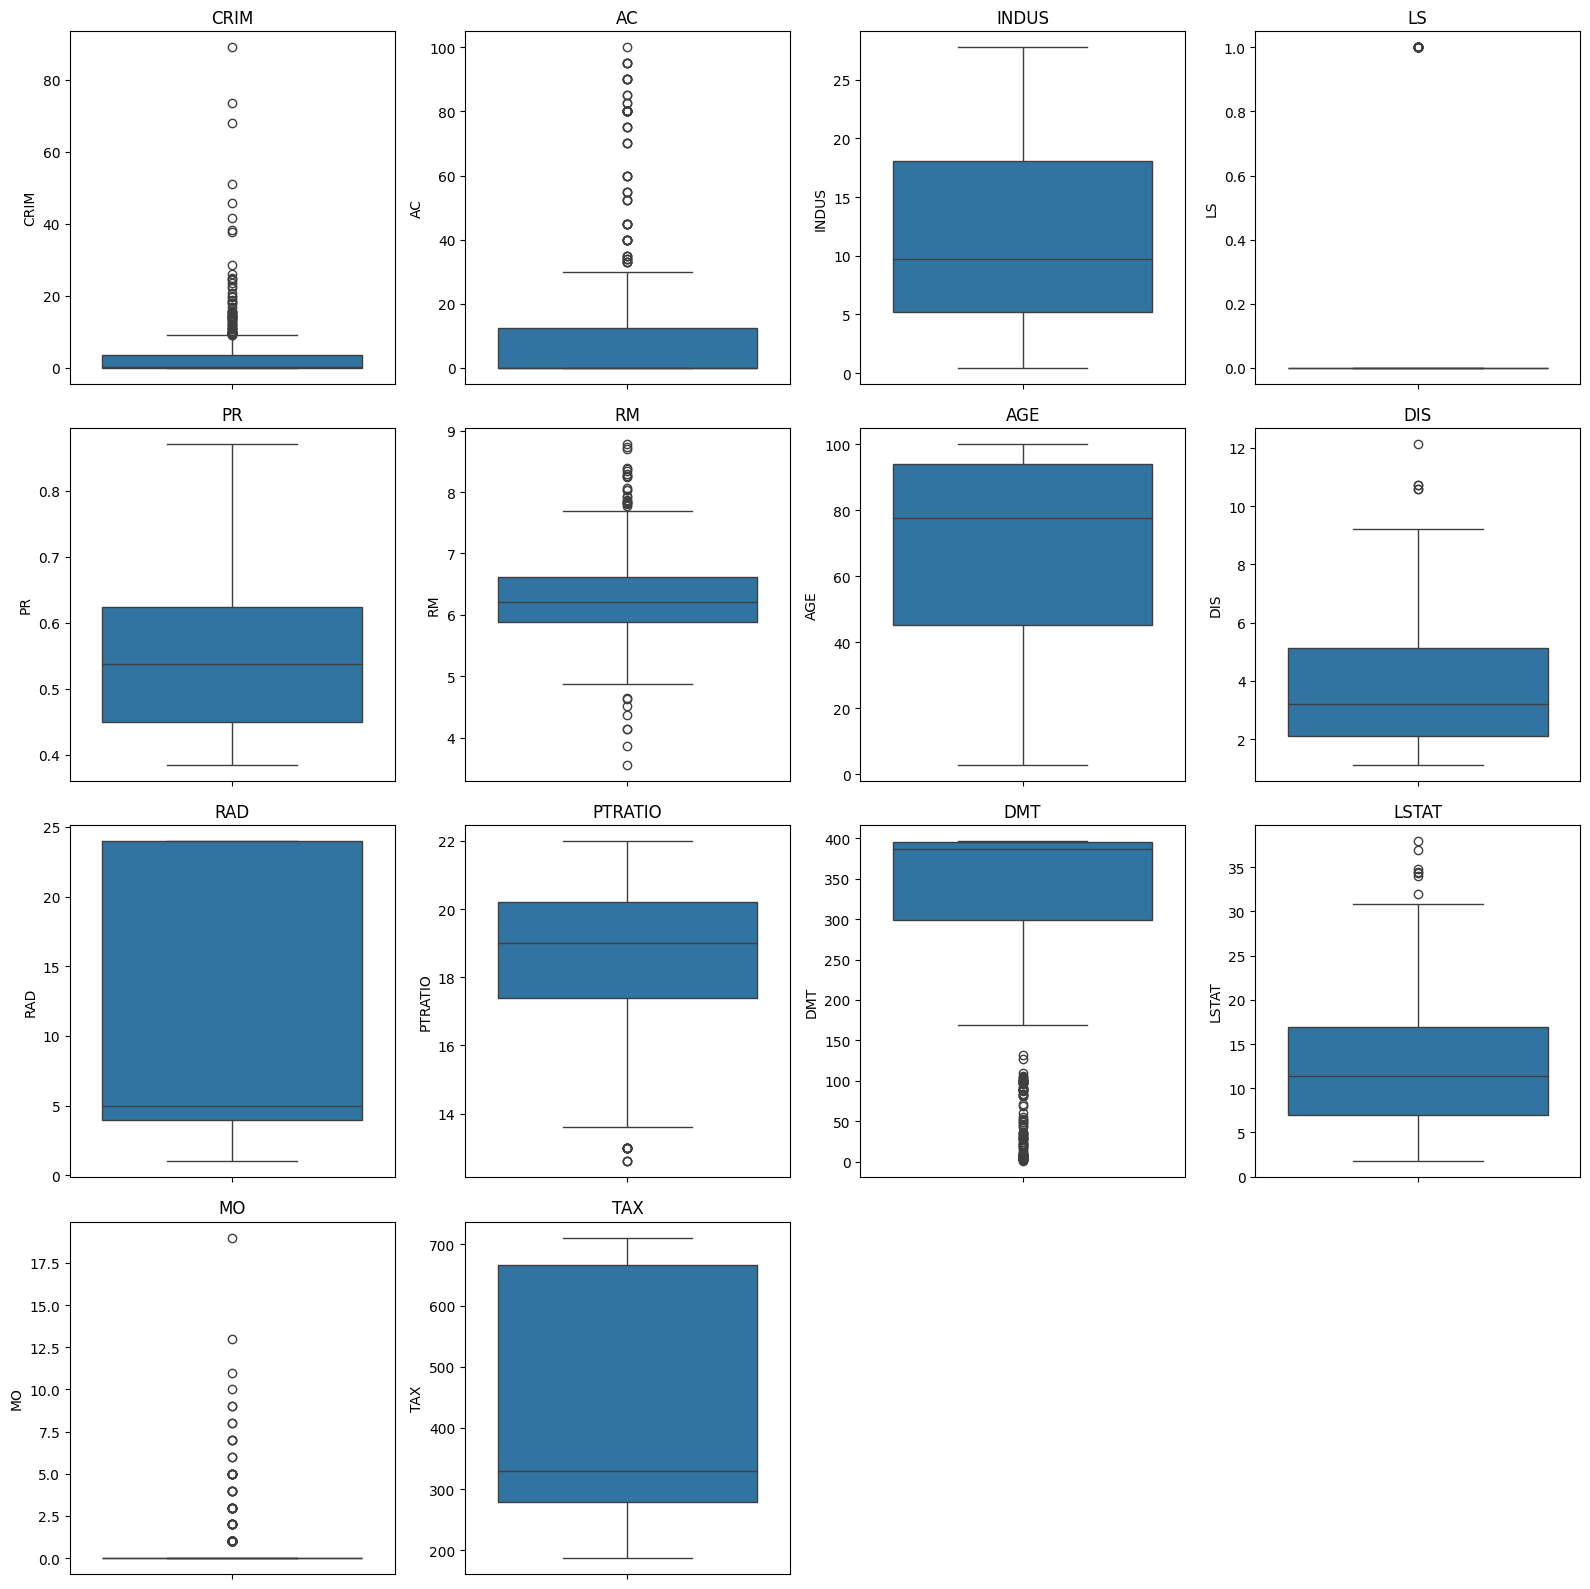

In [15]:
plt.figure(figsize=(16, 16))
for i, col in enumerate(house_data_imputed.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(house_data_imputed[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

The dataset has quite a number of outliers in it, for more accurate prediction to achieve our objective, we capped the outliers ie fit them into the data without removing them

In [7]:
house_data_cleaned = house_data_imputed.copy()

for col in house_data_imputed.columns:
    Q1 = house_data_imputed[col].quantile(0.25)
    Q3 = house_data_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    house_data_cleaned[col] = np.where(house_data_imputed[col] < lower, lower,
                              np.where(house_data_imputed[col] > upper, upper, house_data_imputed[col]))


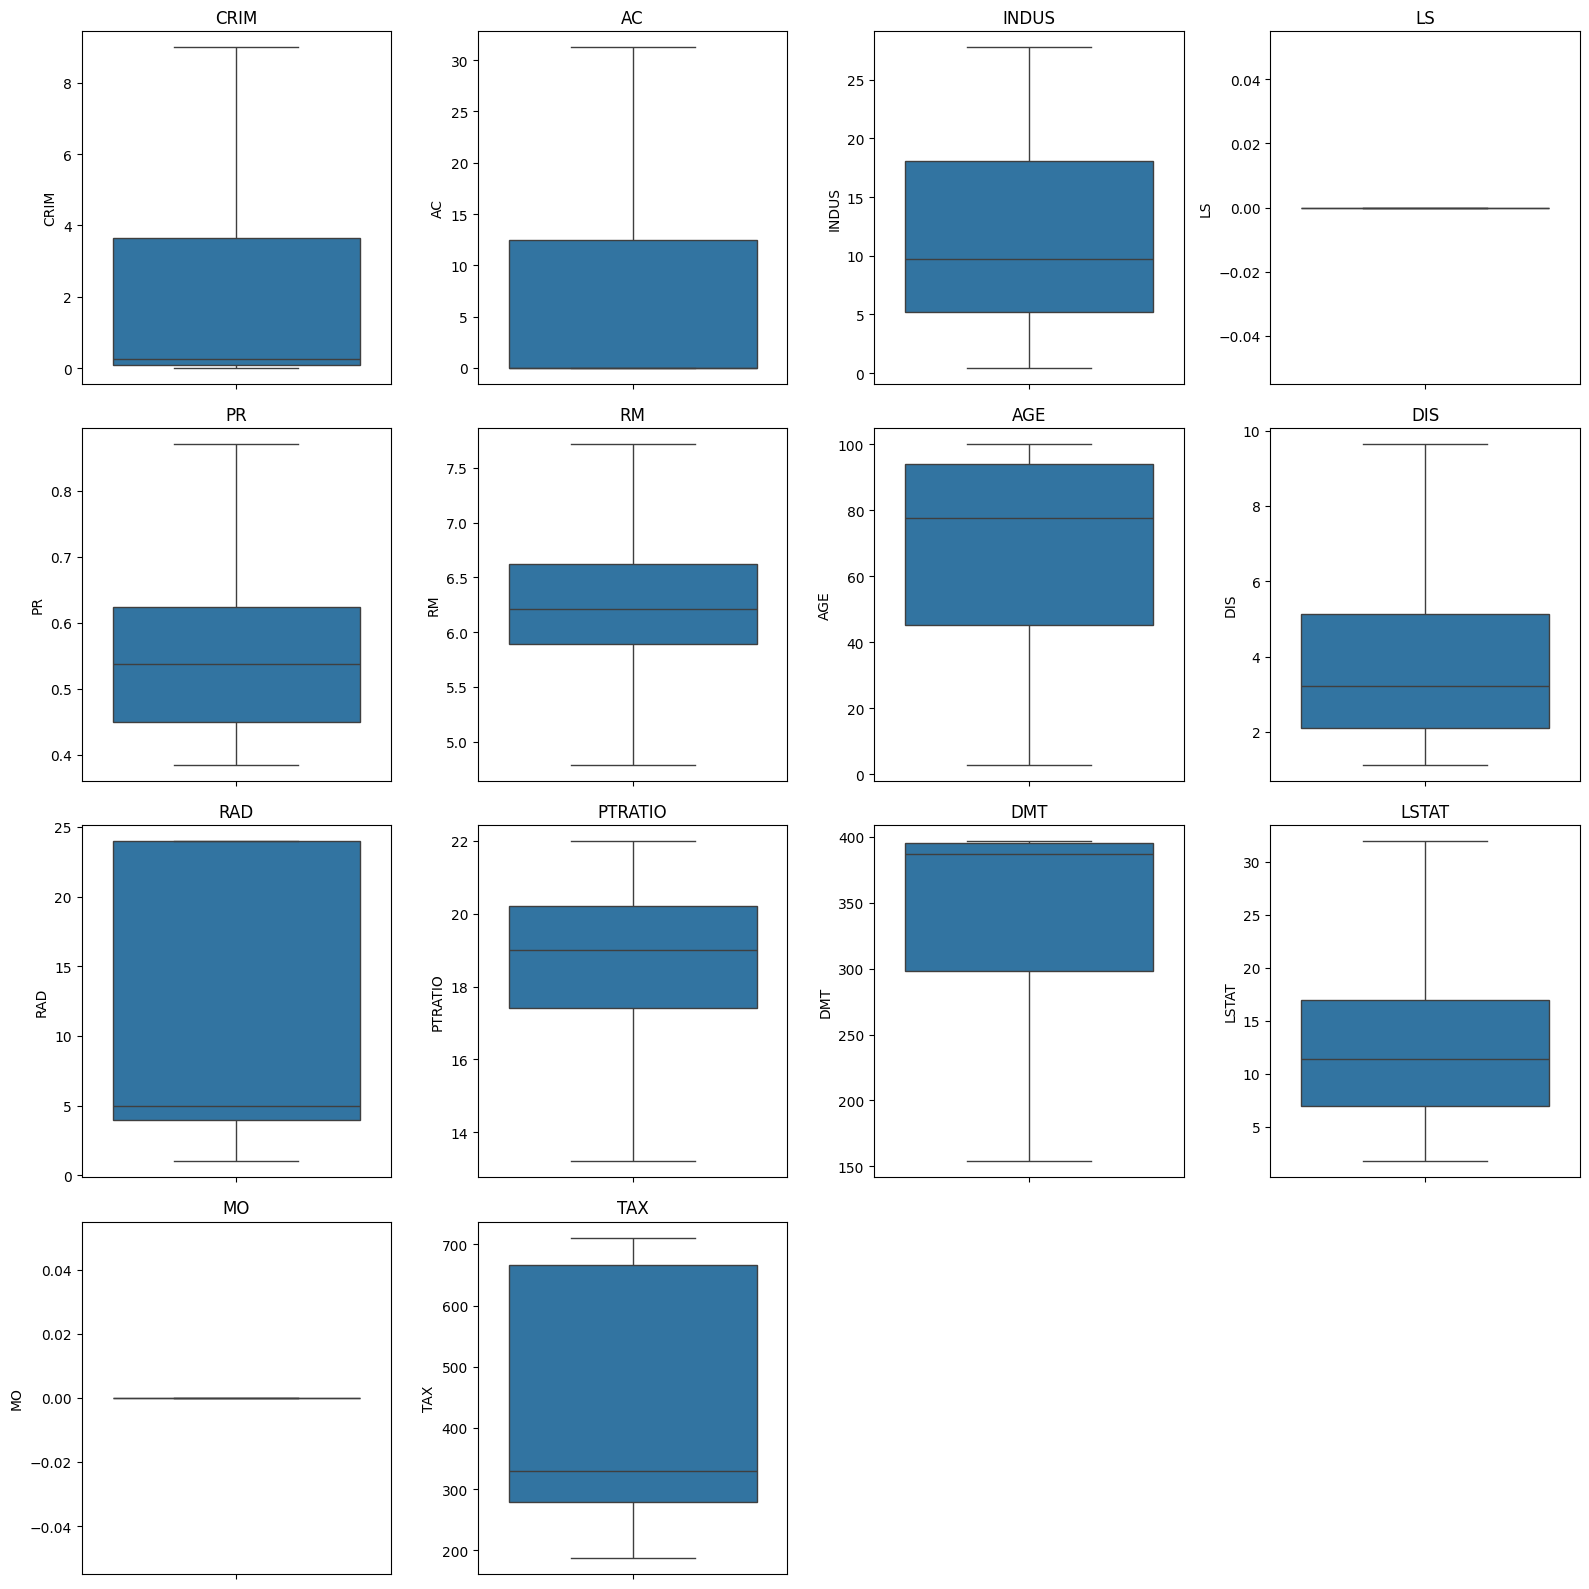

In [17]:
plt.figure(figsize=(16, 16))
for i, col in enumerate(house_data_cleaned.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(house_data_cleaned[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Since the PR is our target variable, separating from the dataset is important becausing the I'm trying to predict that target variable using the other variables (features)

In [9]:

# Separate features (X) and target (y)
X = house_data_cleaned.drop(columns=["PR"])
y = house_data_cleaned["PR"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (404, 13)  Test size: (102, 13)


# 4 Modelling

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


**Linear Regression**

Why use it?

Simple, fast, and interpretable.

Shows direct relationships between predictors (like CRIM, RM, TAX) and Pollution Rate (PR).

Serves as a baseline model for comparison with more complex algorithms.

**Limitations**

Assumes linear relationships between features and taregt(PR).

Sensitive to outliers.

Might underfit if pollution is influenced by non-linear interactions (like CRIM × TAX effects).



**Random Forest**

Why use it?

Handles non-linear relationships automatically.

Works well when there are interactions between variables.

Provides feature importance → useful for identifying key drivers of PR.

Robust to outliers and missing data.

Generally performs very well in practice without heavy tuning.

**Limitations**

Less interpretable than linear regression.

Can be slower on very large datasets.

May overfit if not tuned.

In [11]:

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)


# 5. Evaluation

Use RMSE and R².

why use RMSE and R²

RMSE measures the average magnitude of prediction errors. Tells the absolute prediction accuracy

R² explains proportion of variance ie tells us how much variance is captured

  R² = 1 → perfect prediction.

  R² = 0 → model is no better than the mean.



In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} → RMSE: {rmse:.3f}, R²: {r2:.3f}")

evaluate(y_test, y_pred_lin, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression → RMSE: 0.053, R²: 0.759
Random Forest → RMSE: 0.038, R²: 0.875


Random forest performs better with almost perfect R2 and and minimal prediction error of RMSE

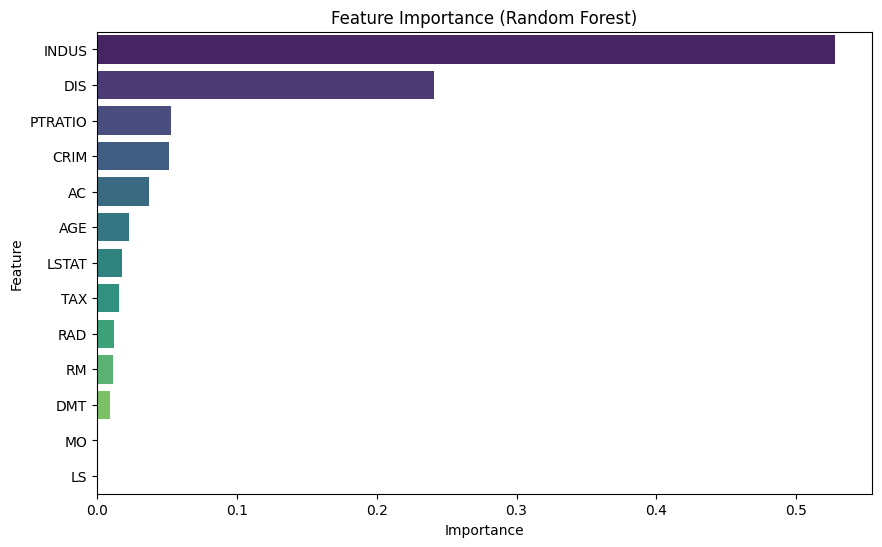

In [14]:
importances = rf_reg.feature_importances_
features = house_data_cleaned.drop(columns=["PR"]).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis",hue= features[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

This shows which variables influences pollution the most.

Based on my objective, to predictive pllution rate,  propoortion of non retail business which is the greatest influence on pollution this could be due Industrial activity is linked to pollution,Urban planning and emissions(Higher INDUS means the area is less residential/retail and more industrial.). Foolow by DIS - weighted distances to major employment centres with relative influence on pollution rate


# 6. Deployment

In [15]:
import streamlit as st
import joblib

# Save the Random Forest model
joblib.dump(rf_reg, "pollution_model.pkl")


['pollution_model.pkl']

In [16]:
%%writefile streamlit_app.py
import streamlit as st
import joblib
import pandas as pd

model = joblib.load("pollution_model.pkl")

st.title("Pollution Prediction App")
st.write("Enter the feature values to predict pollution levels.")

feature_names = ['CRIM', 'AC', 'INDUS', 'LS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'DMT', 'LSTAT', 'MO', 'TAX']

input_data = {}
for feature in feature_names:
    input_data[feature] = st.number_input(f"{feature}", value=0.0)


input_df = pd.DataFrame([input_data])


if st.button("Predict"):
    prediction = model.predict(input_df)[0]
    st.success(f"Predicted Pollution Level: {prediction:.4f}")

if st.checkbox("Show Feature Importance"):
    importances = model.feature_importances_
    st.bar_chart(pd.Series(importances, index=feature_names))


Writing streamlit_app.py


# ASSOCIATION RULE MINING

In [28]:
cassava_data = pd.read_excel('Cassava_Yield_Data.xlsx')
cassava_data

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2,2,3,3,conv,F1100,19,0,0.0,33,1.0,220,2.1,253,13.315789,3.1,4.2,10000,7380.952381,602380.952381
111,2,2,3,3,conv,F5300,16,0,0.0,22,1.0,204,1.9,226,14.125000,2.9,4.2,10000,6904.761905,538095.238095
112,2,2,3,3,conv,F2150,13,0,0.0,8,0.4,52,1.2,60,4.615385,1.6,4.2,10000,3809.523810,142857.142857
113,2,2,3,3,conv,F4250,20,0,0.0,42,1.9,91,1.8,133,6.650000,3.7,4.2,10000,8809.523810,316666.666667


The dataset has 115 rows of cassva yield data for different seasons. These can be analysed and association rules can be generated by algorithms like Apriori Algorithm. Specifically interested in the FerT( Fertilizer), Sessn(Season) and how to use the information to determine the association between fertilisers across seasons

In [ ]:
cassava_data.shape

(115, 20)

In [ ]:
cassava_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64
 15  Total_

In [ ]:
cassava_data.describe()

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


In [ ]:
cassava_data.isna().sum()

,0
Sesn,0
locn,0
block,0
rep,0
tillage,0
ferT,0
Plants_harvested,0
No_bigtubers,0
Weigh_bigtubers,0
No_mediumtubers,0


In [28]:
cassava_data['ferT'].nunique()

5

There are 5 unique ferT used in the two different seasons

In [38]:
cassava_data[(cassava_data['ferT'] == 'F1100') & (cassava_data['Sesn'] == 1)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
30,1,1,1,1,conv,F1100,20,0,0.0,32,1.3,80,1.0,112,5.600000,2.3,4.2,10000,5476.190476,266666.666667
35,1,1,2,2,conv,F1100,19,0,0.0,75,4.5,120,2.4,195,10.263158,6.9,4.2,10000,16428.571429,464285.714286
40,1,1,3,3,conv,F1100,15,10,1.3,98,5.4,119,1.9,227,15.133333,8.6,4.2,10000,20476.190476,540476.190476
45,1,1,2,2,minimum,F1100,16,0,0.0,37,2.5,109,2.0,146,9.125000,4.5,4.2,10000,10714.285714,347619.047619
50,1,1,3,3,minimum,F1100,20,17,2.7,104,6.1,132,2.6,253,12.650000,11.4,4.2,10000,27142.857143,602380.952381
55,1,2,1,1,conv,F1100,13,0,0.0,18,1.1,104,1.8,122,9.384615,2.9,4.2,10000,6904.761905,290476.190476
60,1,2,2,2,conv,F1100,10,0,0.0,15,1.3,45,1.2,60,6.000000,2.5,4.2,10000,5952.380952,142857.142857
65,1,2,3,3,conv,F1100,17,0,0.0,27,1.1,105,2.5,132,7.764706,3.6,4.2,10000,8571.428571,314285.714286
70,1,2,1,1,minimum,F1100,15,0,0.0,34,2.0,110,2.5,144,9.600000,4.5,4.2,10000,10714.285714,342857.142857
75,1,2,2,2,minimum,F1100,7,0,0.0,39,2.8,88,1.7,127,18.142857,4.5,4.2,10000,10714.285714,302380.952381


In [39]:
cassava_data[(cassava_data['ferT'] == 'F1100') & (cassava_data['Sesn'] == 2)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
8,2,1,2,2,conv,F1100,28,1,0.2,64,2.6,305,5.4,370,13.214286,8.2,5.3,10000,15471.698113,698113.207547
14,2,1,3,3,conv,F1100,28,0,0.0,68,2.9,276,5.2,344,12.285714,8.1,5.3,10000,15283.018868,649056.603774
16,2,1,1,1,minimum,F1100,28,0,0.0,77,3.0,266,3.5,343,12.250000,6.5,5.3,10000,12264.150943,647169.811321
23,2,1,2,2,minimum,F1100,28,0,0.0,40,1.5,235,3.4,275,9.821429,4.9,5.3,10000,9245.283019,518867.924528
29,2,1,3,3,minimum,F1100,28,0,0.0,29,1.3,262,4.0,291,10.392857,5.3,5.3,10000,10000.000000,549056.603774
85,2,2,1,1,minimum,F1100,17,0,0.0,18,1.0,98,1.2,116,6.823529,2.2,4.2,10000,5238.095238,276190.476190
90,2,2,2,2,minimum,F1100,15,0,0.0,11,0.5,46,1.0,57,3.800000,1.5,4.2,10000,3571.428571,135714.285714
95,2,2,3,3,minimum,F1100,15,0,0.0,11,0.5,50,1.0,61,4.066667,1.5,4.2,10000,3571.428571,145238.095238
100,2,2,1,1,conv,F1100,13,0,0.0,0,0.0,68,1.0,68,5.230769,1.0,4.2,10000,2380.952381,161904.761905


In [40]:
cassava_data[(cassava_data['ferT'] == 'F5300') & (cassava_data['Sesn'] == 1)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
34,1,1,1,1,conv,F5300,19,3,0.4,25,1.2,148,2.0,176,9.263158,3.6,4.2,10000,8571.428571,419047.619048
39,1,1,2,2,conv,F5300,20,12,1.3,86,4.4,128,2.7,226,11.300000,8.4,4.2,10000,20000.000000,538095.238095
44,1,1,3,3,conv,F5300,19,21,3.0,103,6.5,157,3.5,281,14.789474,13.0,4.2,10000,30952.380952,669047.619048
49,1,1,2,2,minimum,F5300,17,0,0.0,36,1.6,56,1.7,92,5.411765,3.3,4.2,10000,7857.142857,219047.619048
54,1,1,3,3,minimum,F5300,19,10,1.5,101,5.9,222,3.5,333,17.526316,10.9,4.2,10000,25952.380952,792857.142857
59,1,2,1,1,conv,F5300,10,17,3.1,38,3.0,137,3.0,192,19.200000,9.1,4.2,10000,21666.666667,457142.857143
64,1,2,2,2,conv,F5300,15,11,2.0,55,4.5,88,2.0,154,10.266667,8.5,4.2,10000,20238.095238,366666.666667
69,1,2,3,3,conv,F5300,12,19,3.1,34,3.0,37,1.6,90,7.500000,7.7,4.2,10000,18333.333333,214285.714286
74,1,2,1,1,minimum,F5300,15,0,0.0,63,4.1,106,2.1,169,11.266667,6.2,4.2,10000,14761.904762,402380.952381
79,1,2,2,2,minimum,F5300,12,0,0.0,66,5.3,84,3.0,150,12.500000,8.3,4.2,10000,19761.904762,357142.857143


In [41]:
cassava_data[(cassava_data['ferT'] == 'F5300') & (cassava_data['Sesn'] == 2)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
5,2,1,2,2,conv,F5300,28,6,0.5,65,2.7,299,4.5,370,13.214286,7.7,5.3,10000,14528.301887,698113.207547
11,2,1,3,3,conv,F5300,28,3,0.3,97,4.5,290,4.8,390,13.928571,9.6,5.3,10000,18113.207547,735849.056604
18,2,1,1,1,minimum,F5300,28,0,0.0,60,3.0,278,4.7,338,12.071429,7.7,5.3,10000,14528.301887,637735.849057
20,2,1,2,2,minimum,F5300,28,2,0.2,37,1.7,285,4.1,324,11.571429,6.0,5.3,10000,11320.754717,611320.754717
26,2,1,3,3,minimum,F5300,28,2,0.3,73,3.4,264,4.5,339,12.107143,8.2,5.3,10000,15471.698113,639622.641509
86,2,2,1,1,minimum,F5300,17,0,0.0,13,0.5,84,0.9,97,5.705882,1.4,4.2,10000,3333.333333,230952.380952
91,2,2,2,2,minimum,F5300,13,0,0.0,21,1.0,51,0.5,72,5.538462,1.5,4.2,10000,3571.428571,171428.571429
98,2,2,3,3,minimum,F5300,12,0,0.0,19,0.5,48,0.5,67,5.583333,1.0,4.2,10000,2380.952381,159523.809524
103,2,2,1,1,conv,F5300,18,0,0.0,38,2.5,120,2.5,158,8.777778,5.0,4.2,10000,11904.761905,376190.476190


In [42]:
cassava_data[(cassava_data['ferT'] == 'F2150') & (cassava_data['Sesn'] == 1)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
32,1,1,1,1,conv,F2150,18,0,0.0,6,0.2,90,0.9,96,5.333333,1.1,4.2,10000,2619.047619,228571.428571
37,1,1,2,2,conv,F2150,19,0,0.0,24,1.0,180,2.2,204,10.736842,3.2,4.2,10000,7619.047619,485714.285714
42,1,1,3,3,conv,F2150,20,36,5.1,124,7.0,109,1.8,269,13.450000,13.9,4.2,10000,33095.238095,640476.190476
47,1,1,2,2,minimum,F2150,18,0,0.0,47,2.2,145,2.0,192,10.666667,4.2,4.2,10000,10000.000000,457142.857143
52,1,1,3,3,minimum,F2150,18,8,1.3,101,6.5,120,2.5,229,12.722222,10.3,4.2,10000,24523.809524,545238.095238
57,1,2,1,1,conv,F2150,12,0,0.0,14,0.9,70,1.2,84,7.000000,2.1,4.2,10000,5000.000000,200000.000000
62,1,2,2,2,conv,F2150,6,2,0.1,27,3.0,50,1.0,79,13.166667,4.1,4.2,10000,9761.904762,188095.238095
67,1,2,3,3,conv,F2150,12,0,0.0,11,1.0,85,1.5,96,8.000000,2.5,4.2,10000,5952.380952,228571.428571
72,1,2,1,1,minimum,F2150,18,0,0.0,16,1.1,172,3.8,188,10.444444,4.9,4.2,10000,11666.666667,447619.047619
77,1,2,2,2,minimum,F2150,10,0,0.0,15,1.0,46,1.0,61,6.100000,2.0,4.2,10000,4761.904762,145238.095238


In [43]:
cassava_data[(cassava_data['ferT'] == 'F2150') & (cassava_data['Sesn'] == 2)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
9,2,1,2,2,conv,F2150,28,1,0.1,56,2.5,308,4.5,365,13.035714,7.1,5.3,10000,13396.226415,688679.245283
12,2,1,3,3,conv,F2150,28,3,0.3,59,2.7,286,4.7,348,12.428571,7.7,5.3,10000,14528.301887,656603.773585
15,2,1,1,1,minimum,F2150,28,1,0.2,59,2.5,316,4.2,376,13.428571,6.9,5.3,10000,13018.867925,709433.962264
24,2,1,2,2,minimum,F2150,28,1,0.2,44,2.2,251,3.6,296,10.571429,6.0,5.3,10000,11320.754717,558490.566038
27,2,1,3,3,minimum,F2150,28,2,0.2,28,1.3,242,3.8,272,9.714286,5.3,5.3,10000,10000.000000,513207.547170
89,2,2,1,1,minimum,F2150,14,0,0.0,10,0.9,67,1.1,77,5.500000,2.0,4.2,10000,4761.904762,183333.333333
94,2,2,2,2,minimum,F2150,7,0,0.0,16,2.0,94,1.5,110,15.714286,3.5,4.2,10000,8333.333333,261904.761905
96,2,2,3,3,minimum,F2150,16,0,0.0,30,1.0,85,0.9,115,7.187500,1.9,4.2,10000,4523.809524,273809.523810
101,2,2,1,1,conv,F2150,14,0,0.0,29,1.8,70,1.4,99,7.071429,3.2,4.2,10000,7619.047619,235714.285714


In [44]:
cassava_data[(cassava_data['ferT'] == 'F3200') & (cassava_data['Sesn'] == 1)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
31,1,1,1,1,conv,F3200,18,0,0.0,44,1.8,101,1.7,145,8.055556,3.5,4.2,10000,8333.333333,345238.095238
36,1,1,2,2,conv,F3200,15,14,2.4,72,4.9,126,2.7,212,14.133333,10.0,4.2,10000,23809.523810,504761.904762
41,1,1,3,3,conv,F3200,17,14,2.1,122,7.2,115,1.5,251,14.764706,10.8,4.2,10000,25714.285714,597619.047619
46,1,1,2,2,minimum,F3200,18,6,1.0,108,6.7,112,1.8,226,12.555556,9.5,4.2,10000,22619.047619,538095.238095
51,1,1,3,3,minimum,F3200,18,17,3.5,93,6.1,105,2.1,215,11.944444,11.7,4.2,10000,27857.142857,511904.761905
56,1,2,1,1,conv,F3200,14,1,0.1,38,2.7,78,2.0,117,8.357143,4.8,4.2,10000,11428.571429,278571.428571
61,1,2,2,2,conv,F3200,9,7,1.0,62,3.3,87,1.9,156,17.333333,6.2,4.2,10000,14761.904762,371428.571429
66,1,2,3,3,conv,F3200,9,6,1.5,23,1.9,39,1.1,68,7.555556,4.5,4.2,10000,10714.285714,161904.761905
71,1,2,1,1,minimum,F3200,12,0,0.0,50,4.9,106,3.8,156,13.000000,8.7,4.2,10000,20714.285714,371428.571429
76,1,2,2,2,minimum,F3200,13,10,1.0,35,2.0,63,1.0,108,8.307692,4.0,4.2,10000,9523.809524,257142.857143


In [45]:
cassava_data[(cassava_data['ferT'] == 'F3200') & (cassava_data['Sesn'] == 2)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
6,2,1,2,2,conv,F3200,28,0,0.0,91,3.9,289,4.8,380,13.571429,8.7,5.3,10000,16415.094340,716981.132075
13,2,1,3,3,conv,F3200,28,0,0.0,81,3.3,138,3.9,219,7.821429,7.2,5.3,10000,13584.905660,413207.547170
17,2,1,1,1,minimum,F3200,28,2,0.3,54,2.4,243,4.0,299,10.678571,6.7,5.3,10000,12641.509434,564150.943396
21,2,1,2,2,minimum,F3200,28,0,0.0,49,2.1,272,4.9,321,11.464286,7.0,5.3,10000,13207.547170,605660.377358
28,2,1,3,3,minimum,F3200,28,0,0.0,49,2.9,232,3.6,281,10.035714,6.5,5.3,10000,12264.150943,530188.679245
88,2,2,1,1,minimum,F3200,17,0,0.0,17,1.1,87,1.4,104,6.117647,2.5,4.2,10000,5952.380952,247619.047619
93,2,2,2,2,minimum,F3200,18,0,0.0,20,1.0,87,2.1,107,5.944444,3.1,4.2,10000,7380.952381,254761.904762
99,2,2,3,3,minimum,F3200,10,0,0.0,14,1.0,64,1.5,78,7.800000,2.5,4.2,10000,5952.380952,185714.285714
104,2,2,1,1,conv,F3200,17,0,0.0,17,0.5,109,2.0,126,7.411765,2.5,4.2,10000,5952.380952,300000.000000


In [46]:
cassava_data[(cassava_data['ferT'] == 'F4250') & (cassava_data['Sesn'] == 1)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
33,1,1,1,1,conv,F4250,20,3,0.5,93,3.9,101,1.8,197,9.850000,6.2,4.2,10000,14761.904762,469047.619048
38,1,1,2,2,conv,F4250,19,4,0.7,100,5.6,92,1.8,196,10.315789,8.1,4.2,10000,19285.714286,466666.666667
43,1,1,3,3,conv,F4250,19,41,7.0,74,4.5,108,1.1,223,11.736842,12.6,4.2,10000,30000.000000,530952.380952
48,1,1,2,2,minimum,F4250,18,0,0.0,35,2.2,160,2.3,195,10.833333,4.5,4.2,10000,10714.285714,464285.714286
53,1,1,3,3,minimum,F4250,19,24,3.7,126,8.1,104,2.3,254,13.368421,14.1,4.2,10000,33571.428571,604761.904762
58,1,2,1,1,conv,F4250,12,7,1.9,35,2.9,107,2.5,149,12.416667,7.3,4.2,10000,17380.952381,354761.904762
63,1,2,2,2,conv,F4250,17,1,0.1,63,4.0,122,2.3,186,10.941176,6.4,4.2,10000,15238.095238,442857.142857
68,1,2,3,3,conv,F4250,5,7,1.0,23,1.9,40,1.0,70,14.000000,3.9,4.2,10000,9285.714286,166666.666667
73,1,2,1,1,minimum,F4250,15,5,1.0,38,3.0,142,3.0,185,12.333333,7.0,4.2,10000,16666.666667,440476.190476
78,1,2,2,2,minimum,F4250,14,10,2.0,64,5.0,64,1.5,138,9.857143,8.5,4.2,10000,20238.095238,328571.428571


In [47]:
cassava_data[(cassava_data['ferT'] == 'F4250') & (cassava_data['Sesn'] == 2)]

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830
7,2,1,2,2,conv,F4250,28,0,0.0,72,3.5,246,4.6,318,11.357143,8.1,5.3,10000,15283.018868,600000.000000
10,2,1,3,3,conv,F4250,28,4,0.5,63,3.0,376,5.0,443,15.821429,8.5,5.3,10000,16037.735849,835849.056604
19,2,1,1,1,minimum,F4250,28,2,0.3,50,2.6,296,5.1,348,12.428571,8.0,5.3,10000,15094.339623,656603.773585
22,2,1,2,2,minimum,F4250,28,0,0.0,51,2.3,220,3.6,271,9.678571,5.9,5.3,10000,11132.075472,511320.754717
25,2,1,3,3,minimum,F4250,28,0,0.0,51,2.3,256,4.1,307,10.964286,6.4,5.3,10000,12075.471698,579245.283019
87,2,2,1,1,minimum,F4250,10,0,0.0,17,0.8,92,1.3,109,10.900000,2.1,4.2,10000,5000.000000,259523.809524
92,2,2,2,2,minimum,F4250,15,0,0.0,31,2.1,95,2.0,126,8.400000,4.1,4.2,10000,9761.904762,300000.000000
97,2,2,3,3,minimum,F4250,18,0,0.0,28,2.0,120,3.0,148,8.222222,5.0,4.2,10000,11904.761905,352380.952381
102,2,2,1,1,conv,F4250,14,0,0.0,26,1.5,84,2.0,110,7.857143,3.5,4.2,10000,8333.333333,261904.761905


In [29]:
season = cassava_data.groupby("Sesn")["ferT"].apply(list).to_dict()
for season, ferts in season.items():
    print(f"Season {season} → {ferts}")

Season 1 → ['F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F4250', 'F5300', 'F1100', 'F3200', 'F2150', 'F5300', 'F4250']
Season 2 → ['F2150', 'F1100', 'F3200', 'F5300', 'F4250', 'F5300', 'F3200', 'F4250', 'F1100', 'F2150', 'F4250', 'F5300', 'F2150', 'F3200', 'F1100', 'F2150', 'F1100', 'F3200', 'F5300', 'F4250', 'F5300', 'F3200', 'F4250', 'F1100', 'F2150', 'F4250', 'F5300', 'F2150', 'F3200', 'F1100', 'F1100', 'F5300', 'F4250', 'F3200', 'F2150', 'F1100', 'F5300', 'F4250', 'F3200', 'F2150', 'F1100', 'F2150', 'F4250', 'F5300', 'F3200', 'F1100', 'F2150', 'F4250', 'F5300', 'F3200', 'F1100', 'F4250', 'F3200', 'F53

From the preliminary invesigation, we see that in the two seasons, the fertilizers are being used together in both seasons.

In [30]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [31]:
# Group by "Sesn" and collect unique "ferT" items in a list
se1 = cassava_data.groupby("Sesn")["ferT"].apply(lambda x: list(set(x))).tolist()
se1

[['F3200', 'F1100', 'F5300', 'F4250', 'F2150'],
 ['F3200', 'F1100', 'F5300', 'F4250', 'F2150']]

In [32]:
from mlxtend.preprocessing import TransactionEncoder

In [33]:
te = TransactionEncoder()
te_ary = te.fit(se1).transform(se1)

In [34]:
cassava_data_encoded = pd.DataFrame(te_ary, columns=te.columns_)
cassava_data_encoded

,F1100,F2150,F3200,F4250,F5300
0,True,True,True,True,True
1,True,True,True,True,True


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

For min_support, the logic is, supposed one fertiliser(F1100) is used in both season, the support is the two seasons (2) divide by the 100%
ie 2/100 = 0.02

If min_support = 0.02, we keep F110 .

If min_support = 0.1, we drop it.

In [39]:
# Generating   frequent itemsets
frequent_itemsets = apriori(cassava_data_encoded, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(F1100)
1,1.0,(F2150)
2,1.0,(F3200)
3,1.0,(F4250)
4,1.0,(F5300)
5,1.0,"(F2150, F1100)"
6,1.0,"(F3200, F1100)"
7,1.0,"(F1100, F4250)"
8,1.0,"(F1100, F5300)"
9,1.0,"(F3200, F2150)"


In [40]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1.0)
rules = rules.sort_values(by="confidence")
rules

C:\Users\joyaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(F2150),(F1100),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
115,"(F2150, F1100)","(F5300, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
116,"(F2150, F4250)","(F1100, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
117,"(F1100, F4250)","(F2150, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
118,(F5300),"(F2150, F1100, F4250)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,"(F3200, F2150)",(F5300),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
63,"(F3200, F5300)",(F2150),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
64,"(F2150, F5300)",(F3200),1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0
66,(F2150),"(F3200, F5300)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,inf,0.0,1.0,0.0,1.0



## Interprete of the results

* antecedent support -> This  gives an idea of how frequent antecedent is in all se1. Like (F2150) is present in 100% of the se1.

* consequent support -> This measure gives an idea of how frequent consequent is in all the se1. Like (F2150) is present in 100% of the se1.

* support -> This gives an idea of frequent ItemSet. Like {(F2150)	(F1100)	} is present in 100%.

* confidance -> This defines the likeliness of occurrence of consequent  given that the  the antecedents has already occured. So {F2150} > {F1100} as a confidence of 1.

* lift -> Ratio between confidence and support. This measure defines the likeliness of occurrence of consequent  given that the c the antecedent has occured, but controlling the popularity of consequent. So lift of {F2150} w.r.t {F1100} is 1.

* A lift value greater than 1 means that one ferT is likely to be used if item one ferT is used